In [1]:
from rdkit import Chem
import numpy as np
import pandas as pd
from IPython.display import display

# Load simulator data

In [46]:
dataset = pd.read_csv("/home/abhor/Desktop/datasets/my_uspto/simulator_dataset.csv", index_col=0)

In [3]:
dataset

,reactants,products,rsig,psig,rcen,pcen
0,CON(C)C(=O)c1ccc(O)nc1,CC(C)CC(=O)c1ccc(O)nc1,[CH3:0][O:1][NH:2][CH3:3],[CH3:0][CH:1]([CH3:2])[CH3:3],[2],[3]
1,O=C(O)c1ccc(Cl)c([N+](=O)[O-])c1,CNc1ccc(C(=O)O)cc1[N+](=O)[O-],[ClH:7],[CH3:0][NH2:1],[7],[1]
2,CCn1cc(C(=O)O)c(=O)c2cc(F)c(-c3ccc(N)cc3)cc21,CCn1cc(C(=O)O)c(=O)c2cc(F)c(-c3ccc(NC=O)cc3)cc21,NaN,[CH2:20]=[O:21],[],[20]
3,COCC(C)Oc1cc(Oc2cnc(C(=O)N3CCC3)cn2)cc(C(=O)O)c1,COCC(C)Oc1cc(Oc2cnc(C(=O)N3CCC3)cn2)cc(C(=O)Nc...,[OH2:26],[NH2:26][c:27]1[cH:28][n:29][c:30]([CH3:31])[c...,[26],[26]
4,Clc1cc2c(Cl)nc(-c3ccncc3)nc2s1,Clc1cc2c(NCc3ccc(Cl)c(Cl)c3)nc(-c3ccncc3)nc2s1,[ClH:5],[NH2:5][CH2:6][c:7]1[cH:8][cH:9][c:10]([Cl:11]...,[5],[5]
...,...,...,...,...,...,...
448504,CCP(CC)CC,CCCCOS(=O)(=O)[O-],[PH:2]([CH2:3][CH3:4])[CH2:5][CH3:6],[CH3:2][CH2:3][O:4][S:5](=[O:6])(=[O:7])[O-:8],[2],[2]
448505,CCCCOS(=O)(=O)OCCCC,CCCC[P+](CC)(CC)CC,[OH:4][S:5](=[O:6])(=[O:7])[O:8][CH2:9][CH2:10...,[P+:4]([CH2:5][CH3:6])([CH2:7][CH3:8])[CH2:9][...,[4],[4]
448506,Cc1cccc(C)c1N=C1NCCN1OCc1ccccn1,Cc1cccc(C)c1N=C1NCCN1O,[CH3:15][c:16]1[cH:17][cH:18][cH:19][cH:20][n:...,NaN,[15],[]
448507,Clc1ccnc(Cl)c1,N[n+]1ccc(Cl)cc1Cl,NaN,[NH3:0],[],[0]


# Filtering dataset

In [4]:
# First we remove those reactions where the signature extraction didnt work properly 
# In these cases, the Chem.Mol of either of rsig or psig is None
rsig_worked = np.array(list(map(lambda x: pd.isna(x) or Chem.MolFromSmiles(x) is not None, dataset["rsig"].tolist())))
psig_worked = np.array(list(map(lambda x: pd.isna(x) or Chem.MolFromSmiles(x) is not None, dataset["psig"].tolist())))

dataset = dataset[rsig_worked & psig_worked]
print(dataset.shape)

[02:04:17] non-ring atom 3 marked aromatic
[02:04:17] non-ring atom 1 marked aromatic
[02:04:17] non-ring atom 0 marked aromatic
[02:04:17] non-ring atom 0 marked aromatic
[02:04:17] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6
[02:04:17] non-ring atom 1 marked aromatic
[02:04:17] non-ring atom 3 marked aromatic
[02:04:17] non-ring atom 0 marked aromatic
[02:04:17] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 5
[02:04:17] non-ring atom 4 marked aromatic
[02:04:17] non-ring atom 5 marked aromatic
[02:04:17] non-ring atom 2 marked aromatic
[02:04:17] non-ring atom 2 marked aromatic
[02:04:17] non-ring atom 0 marked aromatic
[02:04:17] non-ring atom 0 marked aromatic
[02:04:17] non-ring atom 4 marked aromatic
[02:04:17] non-ring atom 4 marked aromatic
[02:04:17] non-ring atom 3 marked aromatic
[02:04:17] non-ring atom 1 marked aromatic
[02:04:17] non-ring atom 1 marked aromatic
[02:04:17] non-ring atom 0 marked aromatic
[02:04:17] non-ring atom 0 marked aromatic
[02:04:17] non-rin

[02:04:17] non-ring atom 14 marked aromatic
[02:04:17] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:17] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:17] non-ring atom 3 marked aromatic
[02:04:17] non-ring atom 0 marked aromatic
[02:04:17] non-ring atom 1 marked aromatic
[02:04:17] non-ring atom 2 marked aromatic
[02:04:18] non-ring atom 0 marked aromatic
[02:04:18] non-ring atom 2 marked aromatic
[02:04:18] non-ring atom 1 marked aromatic
[02:04:18] non-ring atom 8 marked aromatic
[02:04:18] non-ring atom 2 marked aromatic
[02:04:18] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:18] non-ring atom 0 marked aromatic
[02:04:18] non-ring atom 1 marked aromatic
[02:04:18] non-ring atom 0 marked aromatic
[02:04:18] non-ring atom 0 marked aromatic
[02:04:18] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 5
[02:04:18] non-ring atom 1 marked aromatic
[02:04:18] non-ring atom 10 marked aromatic
[02:04:18] non-ring atom 10 marked aromatic
[02:04:18] non-ring at

[02:04:18] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:18] non-ring atom 0 marked aromatic
[02:04:18] non-ring atom 2 marked aromatic
[02:04:18] non-ring atom 1 marked aromatic
[02:04:18] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:18] non-ring atom 0 marked aromatic
[02:04:18] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[02:04:18] non-ring atom 0 marked aromatic
[02:04:18] non-ring atom 0 marked aromatic
[02:04:18] non-ring atom 0 marked aromatic
[02:04:18] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 10 12 13
[02:04:18] non-ring atom 0 marked aromatic
[02:04:18] non-ring atom 1 marked aromatic
[02:04:18] non-ring atom 1 marked aromatic
[02:04:18] non-ring atom 0 marked aromatic
[02:04:18] non-ring atom 5 marked aromatic
[02:04:18] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[02:04:18] non-ring atom 0 marked aromatic
[02:04:18] non-ring atom 0 marked aromatic
[02:04:18] non-ring atom 1 marked aromatic
[02:04:18] non-ring atom 5 

[02:04:19] non-ring atom 1 marked aromatic
[02:04:19] non-ring atom 0 marked aromatic
[02:04:19] non-ring atom 2 marked aromatic
[02:04:19] non-ring atom 0 marked aromatic
[02:04:19] non-ring atom 0 marked aromatic
[02:04:19] non-ring atom 2 marked aromatic
[02:04:19] non-ring atom 0 marked aromatic
[02:04:19] non-ring atom 1 marked aromatic
[02:04:19] non-ring atom 0 marked aromatic
[02:04:19] non-ring atom 0 marked aromatic
[02:04:19] non-ring atom 1 marked aromatic
[02:04:19] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 5
[02:04:19] non-ring atom 4 marked aromatic
[02:04:19] non-ring atom 0 marked aromatic
[02:04:19] non-ring atom 3 marked aromatic
[02:04:19] non-ring atom 0 marked aromatic
[02:04:19] non-ring atom 0 marked aromatic
[02:04:19] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:19] non-ring atom 0 marked aromatic
[02:04:19] non-ring atom 1 marked aromatic
[02:04:19] non-ring atom 0 marked aromatic
[02:04:19] non-ring atom 0 marked aromatic
[02:04:19] non-rin

[02:04:19] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[02:04:19] non-ring atom 1 marked aromatic
[02:04:19] non-ring atom 6 marked aromatic
[02:04:19] non-ring atom 1 marked aromatic
[02:04:19] non-ring atom 1 marked aromatic
[02:04:19] non-ring atom 2 marked aromatic
[02:04:19] non-ring atom 1 marked aromatic
[02:04:19] non-ring atom 0 marked aromatic
[02:04:19] non-ring atom 4 marked aromatic
[02:04:19] non-ring atom 1 marked aromatic
[02:04:19] non-ring atom 1 marked aromatic
[02:04:19] non-ring atom 3 marked aromatic
[02:04:19] non-ring atom 4 marked aromatic
[02:04:19] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:19] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:19] non-ring atom 2 marked aromatic
[02:04:19] non-ring atom 0 marked aromatic
[02:04:19] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:19] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[02:04:19] non-ring atom 11 marked aromatic
[02:04:19] non-ring atom 0 marked aromati

[02:04:20] non-ring atom 7 marked aromatic
[02:04:20] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:20] non-ring atom 4 marked aromatic
[02:04:20] non-ring atom 2 marked aromatic
[02:04:20] non-ring atom 21 marked aromatic
[02:04:20] non-ring atom 2 marked aromatic
[02:04:20] non-ring atom 1 marked aromatic
[02:04:20] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 9 12 13 14 15
[02:04:20] non-ring atom 5 marked aromatic
[02:04:20] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:20] non-ring atom 1 marked aromatic
[02:04:20] non-ring atom 3 marked aromatic
[02:04:20] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:20] non-ring atom 1 marked aromatic
[02:04:20] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[02:04:20] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
[02:04:20] non-ring atom 8 marked aromatic
[02:04:20] non-ring atom 3 marked aromatic
[02:04:20] Can't kekulize mol.  Unkekulized atoms: 0 12 13 14 15 16 17
[02:04:20] non-ring at

[02:04:20] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[02:04:20] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 9 10
[02:04:20] non-ring atom 2 marked aromatic
[02:04:20] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 12
[02:04:20] non-ring atom 1 marked aromatic
[02:04:20] non-ring atom 0 marked aromatic
[02:04:20] non-ring atom 2 marked aromatic
[02:04:20] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:20] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:20] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:20] non-ring atom 3 marked aromatic
[02:04:20] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:20] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[02:04:20] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[02:04:20] non-ring atom 19 marked aromatic
[02:04:20] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5
[02:04:20] non-ring atom 7 marked aromatic
[02:04:20] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6
[

[02:04:21] non-ring atom 1 marked aromatic
[02:04:21] Can't kekulize mol.  Unkekulized atoms: 2 3 4 6 7
[02:04:21] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:21] non-ring atom 1 marked aromatic
[02:04:21] non-ring atom 3 marked aromatic
[02:04:21] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 7 8 9
[02:04:21] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 14
[02:04:21] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:21] non-ring atom 1 marked aromatic
[02:04:21] non-ring atom 0 marked aromatic
[02:04:21] non-ring atom 0 marked aromatic
[02:04:21] non-ring atom 2 marked aromatic
[02:04:21] Can't kekulize mol.  Unkekulized atoms: 0 1 2 7 8
[02:04:21] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5 6 7 8 9
[02:04:21] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12
[02:04:21] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:21] non-ring atom 0 marked aromatic
[02:04:21] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:21] non-ring atom 7

[02:04:21] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:21] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8
[02:04:21] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 6
[02:04:21] Can't kekulize mol.  Unkekulized atoms: 0 1 2 10 11 12 13 14 15
[02:04:21] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 6 8 9 10
[02:04:21] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 8 9 10
[02:04:21] Can't kekulize mol.  Unkekulized atoms: 0 1 2 7 16
[02:04:21] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:21] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:21] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8
[02:04:21] non-ring atom 8 marked aromatic
[02:04:21] non-ring atom 0 marked aromatic
[02:04:21] non-ring atom 3 marked aromatic
[02:04:21] non-ring atom 10 marked aromatic
[02:04:21] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[02:04:21] Can't kekulize mol.  Unkekulized atoms: 7 8 9 11 12
[02:04:21] non-ring atom 0 marked aromatic
[02:04:21] Can't 

[02:04:22] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[02:04:22] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 13
[02:04:22] non-ring atom 0 marked aromatic
[02:04:22] non-ring atom 2 marked aromatic
[02:04:22] non-ring atom 0 marked aromatic
[02:04:22] Can't kekulize mol.  Unkekulized atoms: 0 1 2 5 6
[02:04:22] Can't kekulize mol.  Unkekulized atoms: 0 1 2 6 7
[02:04:22] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 5
[02:04:22] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:22] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 9 12 13 14 15
[02:04:22] non-ring atom 4 marked aromatic
[02:04:22] non-ring atom 2 marked aromatic
[02:04:22] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:22] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:22] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[02:04:22] non-ring atom 2 marked aromatic
[02:04:22] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:22] Can't kekulize mol.  Unkekulized atoms:

[02:04:23] non-ring atom 0 marked aromatic
[02:04:23] non-ring atom 7 marked aromatic
[02:04:23] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:23] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[02:04:23] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[02:04:23] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[02:04:23] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:23] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 11
[02:04:23] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 11 12
[02:04:23] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:23] non-ring atom 12 marked aromatic
[02:04:23] non-ring atom 7 marked aromatic
[02:04:23] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8
[02:04:23] Can't kekulize mol.  Unkekulized atoms: 2 3 4 6 7
[02:04:23] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:23] non-ring atom 1 marked aromatic
[02:04:23] non-ring atom 0 marked aromatic
[02:04:23] Can't kekulize mol.  Unkekuliz

[02:04:24] non-ring atom 5 marked aromatic
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[02:04:24] non-ring atom 2 marked aromatic
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5
[02:04:24] non-ring atom 0 marked aromatic
[02:04:24] non-ring atom 4 marked aromatic
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 19
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 5
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 0 1 2 9 11
[02:04:24] non-ring atom 3 marked aromatic
[02:04:24] non-ring atom 2 marked aromatic
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 

[02:04:24] Can't kekulize mol.  Unkekulized atoms: 3 4 5 11 12
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:24] non-ring atom 12 marked aromatic
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 4 5 6 8 9
[02:04:24] non-ring atom 2 marked aromatic
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 0 1 2 9 10 11 12 13 14
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 11 12
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 2 3 4 6 7
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:24] non-ring atom 3 marked aromatic
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 9 12 13 14
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 0 1 2 6 7
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[02:04:24] non-ring atom 

[02:04:24] non-ring atom 0 marked aromatic
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 7 8 9 10
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:24] non-ring atom 17 marked aromatic
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 2 3 4 6 7 8 9 10 11
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 11 12
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 5
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 9 10
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 4 5 6 8 11
[02:04:24] non-ring atom 16 marked aromatic
[02:04:24] non-ring atom 3 marked aromatic
[02:04:24] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 9 10
[02:04:24] Can't kekulize mol.  Unkekulized a

[02:04:25] non-ring atom 0 marked aromatic
[02:04:25] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 9 12 13 14 15
[02:04:25] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[02:04:25] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:25] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:25] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:25] non-ring atom 3 marked aromatic
[02:04:25] Can't kekulize mol.  Unkekulized atoms: 0 1 5 6 7 8 9 10 11
[02:04:25] Can't kekulize mol.  Unkekulized atoms: 0 1 2
[02:04:25] non-ring atom 5 marked aromatic
[02:04:25] non-ring atom 4 marked aromatic
[02:04:25] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 9 10 11
[02:04:25] non-ring atom 1 marked aromatic
[02:04:25] Can't kekulize mol.  Unkekulized atoms: 0 1 2 7 8
[02:04:25] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 6 7 9 10
[02:04:25] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 6
[02:04:25] non-ring atom 3 marked aromatic
[02:04:25] Can't kekulize mol.  Un

[02:04:25] non-ring atom 9 marked aromatic
[02:04:25] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:25] non-ring atom 10 marked aromatic
[02:04:25] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:25] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:25] Can't kekulize mol.  Unkekulized atoms: 4 6 8 11 12 13 14
[02:04:25] non-ring atom 1 marked aromatic
[02:04:25] non-ring atom 2 marked aromatic
[02:04:25] non-ring atom 2 marked aromatic
[02:04:25] Can't kekulize mol.  Unkekulized atoms: 0 1 14 15 16 17 18 19 20
[02:04:25] Can't kekulize mol.  Unkekulized atoms: 1 2 7 8 9 10 11
[02:04:25] Can't kekulize mol.  Unkekulized atoms: 2 3 4 11 12
[02:04:25] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[02:04:25] non-ring atom 3 marked aromatic
[02:04:25] non-ring atom 2 marked aromatic
[02:04:25] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:25] non-ring atom 0 marked aromatic
[02:04:25] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 

[02:04:26] non-ring atom 2 marked aromatic
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 0 3 4 5 6 7 8 10 11
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
[02:04:26] non-ring atom 0 marked aromatic
[02:04:26] non-ring atom 1 marked aromatic
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 3 4 5 15 16
[02:04:26] non-ring atom 5 marked aromatic
[02:04:26] non-ring atom 3 marked aromatic
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 7 8 9
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[02:04:26] non-ring atom 1 marked aromatic
[02:04:26] non-ring atom 1 marked aromatic
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 0 4 5 6 8 9 10
[02:04:26] Can't kekulize mol.  Unkeku

[02:04:26] non-ring atom 1 marked aromatic
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 0 1 7 9 10 11 12 13 14
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 0 1 13
[02:04:26] non-ring atom 4 marked aromatic
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[02:04:26] non-ring atom 0 marked aromatic
[02:04:26] non-ring atom 2 marked aromatic
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 14
[02:04:26] non-ring atom 0 marked aromatic
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 0 1 3 5 6
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 11 12
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:26] non-ring atom 5 marked aromatic
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
[02:04:26] Can't kekulize mol.  

[02:04:26] non-ring atom 21 marked aromatic
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 0 1 2 6 7 8 9 10 11
[02:04:26] non-ring atom 3 marked aromatic
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 7
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[02:04:26] non-ring atom 3 marked aromatic
[02:04:26] non-ring atom 2 marked aromatic
[02:04:26] non-ring atom 2 marked aromatic
[02:04:26] non-ring atom 2 marked aromatic
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:26] non-ring atom 1 marked aromatic
[02:04:26] non-ring atom 1 marked aromatic
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 8
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:26] non-ring atom 8 marked aromatic
[02:04:26] non-ring atom 0 marked aro

[02:04:26] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:26] non-ring atom 1 marked aromatic
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 11 12
[02:04:26] non-ring atom 1 marked aromatic
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 11 12
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 0 1 2
[02:04:26] non-ring atom 0 marked aromatic
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 1 2 3
[02:04:26] non-ring atom 0 marked aromatic
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 12 13
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 1 2 3 9 10
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 11 12
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:26] non-ring atom 16 marked aromatic
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[02:04:26] non-ring atom 3 marked aromatic
[02:04:26] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 5
[02:04:26] Can't kekulize m

[02:04:27] Can't kekulize mol.  Unkekulized atoms: 0 1 2 9 10 11 12 13 14
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 2 3 4 21 22
[02:04:27] non-ring atom 2 marked aromatic
[02:04:27] non-ring atom 3 marked aromatic
[02:04:27] non-ring atom 1 marked aromatic
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 13
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[02:04:27] non-ring atom 1 marked aromatic
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6
[02:04:27] non-ring atom 4 marked aromatic
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:27] 

[02:04:27] non-ring atom 14 marked aromatic
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 9
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 13 14
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 5
[02:04:27] non-ring atom 1 marked aromatic
[02:04:27] non-ring atom 4 marked aromatic
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 10 11 12 13
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 3 4 5 10 15
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 2 3 4 9 10
[02:04:27] non-ring atom 2 marked aromatic


[02:04:27] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[02:04:27] non-ring atom 3 marked aromatic
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 11 12
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 5
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:27] non-ring atom 0 marked aromatic
[02:04:27] non-ring atom 4 marked aromatic
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:27] non-ring atom 7 marked aromatic
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[02:04:27] non-ring atom 2 marked aromatic
[02:04:27] Can't kekulize mol.  Unkekulized atoms: 2 3 6 7 8 9 10 11 12
[02:04:27] Can'

[02:04:28] non-ring atom 0 marked aromatic
[02:04:28] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:28] non-ring atom 6 marked aromatic
[02:04:28] Can't kekulize mol.  Unkekulized atoms: 1 2 3
[02:04:28] non-ring atom 0 marked aromatic
[02:04:28] Can't kekulize mol.  Unkekulized atoms: 4 5 6 10 11
[02:04:28] Can't kekulize mol.  Unkekulized atoms: 2 3 4 11 12
[02:04:28] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:28] non-ring atom 2 marked aromatic
[02:04:28] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 7
[02:04:28] non-ring atom 3 marked aromatic
[02:04:28] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 8
[02:04:28] Can't kekulize mol.  Unkekulized atoms: 3 4 5 7 10
[02:04:28] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
[02:04:28] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:28] non-ring atom 2 marked aromatic
[02:04:28] non-ring atom 4 marked aromatic
[02:04:28] non-ring atom 2 marked aromatic
[02:04:28] Can't kekulize mol.  U

(438686, 6)


[02:04:28] non-ring atom 1 marked aromatic
[02:04:28] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:28] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 5
[02:04:28] Can't kekulize mol.  Unkekulized atoms: 0 7 8 9 10 11 12
[02:04:28] non-ring atom 2 marked aromatic
[02:04:28] Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 15
[02:04:28] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[02:04:28] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:28] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8
[02:04:28] non-ring atom 0 marked aromatic
[02:04:28] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[02:04:28] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:28] non-ring atom 3 marked aromatic
[02:04:28] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[02:04:28] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[02:04:28] non-ring atom 2 marked aromatic
[02:04:28] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[02:04:28

In [74]:
# we only consider actions from the following reactions: 
# 1. len(rcen) == len(pcen)
# 2. len(rcen) != 0. len(pcen) == 0 is allowed. = 0 means Hydrogen, so we do not want Hydrogen removals because
#    there are too many options in that case. Adding a Hydrogen is fine since that is deterministic.
# 3. len(rcen) <= 2 and len(pcen) <= 2. The cases where this is not true is typically because the 
#    reactant-product mapping is wrong. These cases are few anyways so it's fine.
rlen = np.array(list(map(lambda x: len(x.strip("[]").split(",")) if len(x) > 2 else 0, dataset["rcen"])))
plen = np.array(list(map(lambda x: len(x.strip("[]").split(",")) if len(x) > 2 else 0, dataset["pcen"])))
# dataset = dataset[(rlen==plen) & (rlen!=0) & (rlen<=2) & (pcen<=2)]
# dataset

dataset[(rlen==plen) & (rlen!=0)]

,reactants,products,rsig,psig,rcen,pcen
0,CON(C)C(=O)c1ccc(O)nc1,CC(C)CC(=O)c1ccc(O)nc1,[CH3:0][O:1][NH:2][CH3:3],[CH3:0][CH:1]([CH3:2])[CH3:3],[2],[3]
1,O=C(O)c1ccc(Cl)c([N+](=O)[O-])c1,CNc1ccc(C(=O)O)cc1[N+](=O)[O-],[ClH:7],[CH3:0][NH2:1],[7],[1]
3,COCC(C)Oc1cc(Oc2cnc(C(=O)N3CCC3)cn2)cc(C(=O)O)c1,COCC(C)Oc1cc(Oc2cnc(C(=O)N3CCC3)cn2)cc(C(=O)Nc...,[OH2:26],[NH2:26][c:27]1[cH:28][n:29][c:30]([CH3:31])[c...,[26],[26]
4,Clc1cc2c(Cl)nc(-c3ccncc3)nc2s1,Clc1cc2c(NCc3ccc(Cl)c(Cl)c3)nc(-c3ccncc3)nc2s1,[ClH:5],[NH2:5][CH2:6][c:7]1[cH:8][cH:9][c:10]([Cl:11]...,[5],[5]
6,O=C(N1CCc2ccc(Cl)c(OS(=O)(=O)C(F)(F)F)c2CC1)C(...,CC(Nc1c(Cl)ccc2c1CCN(C(=O)C(F)(F)F)CC2)c1ccc(F...,[OH:11][S:12](=[O:13])(=[O:14])[C:15]([F:16])(...,[CH3:0][CH:1]([NH2:2])[c:21]1[cH:22][cH:23][c:...,[11],[2]
...,...,...,...,...,...,...
448499,CC(C)(C)c1nc2cc(S(=O)(=O)Cl)ccc2n1CC1CCC(F)(F)CC1,CC(C)(C)c1nc2cc(S(=O)(=O)N3CCC(C(=O)NC4CC4)C3)...,[ClH:12],[NH:12]1[CH2:13][CH2:14][CH:15]([C:16](=[O:17]...,[12],[12]
448501,COC(=O)c1ccc(-n2cnc3cc(C#N)ccc32)cc1,N#Cc1ccc2c(c1)ncn2-c1ccc(C(=O)N2CCC(N3CCCC3)C2...,[CH3:0][OH:1],[NH:17]1[CH2:18][CH2:19][CH:20]([N:21]2[CH2:22...,[1],[17]
448502,O=C(Cl)OCC(Cl)(Cl)Cl,O=C(O)OCC(Cl)(Cl)Cl,[ClH:2],[OH2:2],[2],[2]
448504,CCP(CC)CC,CCCCOS(=O)(=O)[O-],[PH:2]([CH2:3][CH3:4])[CH2:5][CH3:6],[CH3:2][CH2:3][O:4][S:5](=[O:6])(=[O:7])[O-:8],[2],[2]


In [6]:
rplen = list(map(lambda x: f"{x[0]}-{x[1]}", zip(rlen, plen)))

In [7]:
np.unique(rplen, return_counts=True)

(array(['0-0', '0-1', '0-2', '0-3', '0-4', '0-5', '0-6', '0-7', '1-0',
        '1-1', '1-2', '1-3', '1-4', '1-5', '1-6', '1-7', '2-0', '2-1',
        '2-2', '2-3', '2-4', '2-5', '2-6', '2-7', '3-0', '3-1', '3-2',
        '3-3', '3-4', '3-5', '3-6', '4-0', '4-1', '4-2', '4-3', '4-4',
        '4-5', '4-6', '5-0', '5-1', '5-2', '5-3', '5-4', '5-5', '6-1',
        '6-3', '7-1', '7-3', '9-1'], dtype='<U3'),
 array([  3620, 138434,   2686,    442,     38,      6,      1,      1,
         73905, 181613,  11562,    640,    171,     28,      5,      2,
         16741,   5489,   1662,    168,     69,     23,      4,      1,
           380,    440,    199,     86,     43,      4,      1,     12,
            54,     63,     22,     21,      5,      1,      1,      7,
            11,     14,      3,      1,      1,      3,      1,      1,
             1]))

In [8]:
dataset.shape

(438686, 6)

In [9]:
temp = dataset[(rlen==0) & (plen==2)]
print(temp.shape)

(2686, 6)


In [76]:
((rlen == 0) & (plen==0)).argmax()

62

In [75]:
rlen[(rlen == 0).argmax()] = 1

(rlen == 0).argmax()

8

In [11]:
temp

,reactants,products,rsig,psig,rcen,pcen
226,Cc1cc2c(s1)Nc1ccccc1N=C2N,Cc1cc2c(s1)Nc1ccccc1N=C2N1CCNC(CCc2ccoc2)C1,NaN,[CH3:16][CH2:17][NH:18][CH:19]([CH2:20][CH2:21...,[],"[16, 27]"
286,CNc1ccc(Br)cc1,C=CCN(C)c1ccc(Br)cc1,NaN,[CH2:0]=[CH2:1].[CH4:4],[],"[1, 4]"
345,O=C1C(N2CCOCC2)=CCCN1c1ccc(I)cc1,COC(=O)C1=NN(c2ccc(Cl)cc2)C2(N3CCOCC3)C(=O)N(c...,NaN,[CH3:0][O:1][C:2](=[O:3])[CH:4]=[N:5][NH:6][c:...,[],"[4, 6]"
418,CCOc1cc(-c2ccc(-c3cc(C(F)(F)F)c(C#N)c(=O)n3Cc3...,CCOc1cc(-c2ccc(-c3cc(C(F)(F)F)c(C#N)c(=O)n3Cc3...,NaN,[OH2:37].[OH2:38],[],"[37, 38]"
548,NCCCCN1CCN(c2ncccn2)CC1,O=C1C2CCC(C2)C(=O)N1CCCCN1CCN(c2ncccn2)CC1,NaN,[O:0]=[CH:1][CH:2]1[CH2:3][CH2:4][CH:5]([CH:7]...,[],"[1, 7]"
...,...,...,...,...,...,...
447720,CSc1ccc(Br)cc1CN,CS(=O)(=O)c1ccc(Br)cc1CN,NaN,[OH2:2].[OH2:3],[],"[2, 3]"
447748,NNc1ccc([N+](=O)[O-])cc1,O=C1CCCC(=O)N1Nc1ccc([N+](=O)[O-])cc1,NaN,[O:0]=[CH:1][CH2:2][CH2:3][CH2:4][CH:5]=[O:6],[],"[1, 5]"
447771,COC(=O)C(N)CO,COC(=O)C1COC(C)(C)N1C(=O)OC(C)(C)C,NaN,[CH2:7]([CH3:8])[CH3:9].[CH:11](=[O:12])[O:13]...,[],"[7, 11]"
447830,CN1CCC(c2cccc3ccccc23)CC1,O=C(OCC(Cl)(Cl)Cl)N1CCC(c2cccc3ccccc23)CC1,NaN,[OH2:0].[OH:2][CH2:3][C:4]([Cl:5])([Cl:6])[Cl:7],[],"[0, 2]"


In [12]:
i = -1

reactants    CCC1(c2cccc(Oc3cc(Cn4c(CCN)cnc4C)ccc3C#N)c2)CC...
products     CCC1(c2cccc(Oc3cc(Cn4c(CCN5CCOCC5)cnc4C)ccc3C#...
rsig                                                       NaN
psig                    [CH3:18][CH2:19][O:20][CH2:21][CH3:22]
rcen                                                        []
pcen                                                  [18, 22]
Name: 3070, dtype: object
Reactant


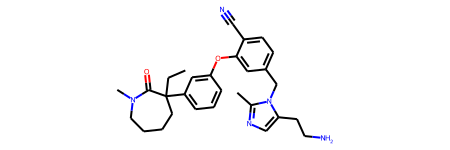

Product


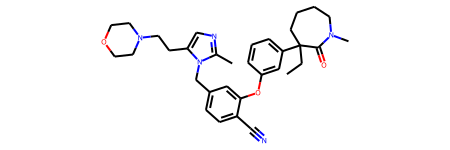

Reactant subgroup
Product subgroup


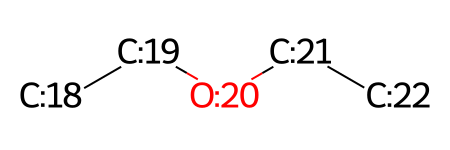

In [36]:
i+=1
print(temp.iloc[i])
print("Reactant")
display(Chem.MolFromSmiles(temp.iloc[i]["reactants"]))
print("Product")
display(Chem.MolFromSmiles(temp.iloc[i]["products"]))
print("Reactant subgroup")
# display(Chem.MolFromSmiles(temp.iloc[i]["rsig"]))
print("Product subgroup")
display(Chem.MolFromSmiles(temp.iloc[i]["psig"]))

In [368]:
x = Chem.MolFromSmiles(temp.iloc[i]["psig"])

In [377]:
print(x)

None
